1 - Filtrei a planilha para criar um DF com duas colunas "Nível Socioeconomico" de 1 a 8 de INSE e "Quantidade de alunos" em cada nível

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF


# Carregue o arquivo Excel
df = pd.read_excel("dados/INSE_2021_escolas.xlsx", usecols=["INSE_CLASSIFICACAO"])

# Uma variável para cada "Nível"
contador_1 = 0
contador_2 = 0
contador_3 = 0
contador_4 = 0
contador_5 = 0
contador_6 = 0
contador_7 = 0
contador_8 = 0

# Encontra todos os valroes iguais ao "x" e armazena na variável
 
for x in df['INSE_CLASSIFICACAO']:
    if x == 1:
        contador_1 +=1

for x in df['INSE_CLASSIFICACAO']:
    if x == 2:
        contador_2 +=1

for x in df['INSE_CLASSIFICACAO']:
    if x == 3:
        contador_3 +=1

for x in df['INSE_CLASSIFICACAO']:
    if x == 4:
        contador_4 +=1

for x in df['INSE_CLASSIFICACAO']:
    if x == 5:
        contador_5 +=1

for x in df['INSE_CLASSIFICACAO']:
    if x == 6:
        contador_6 +=1

for x in df['INSE_CLASSIFICACAO']:
    if x == 7:
        contador_7 +=1

for x in df['INSE_CLASSIFICACAO']:
    if x == 8:
        contador_8 +=1    


# Fiz um dataframe com duas colunas "Nível_Socioeconomico" e "Quantidade de alunos"

tabela_1 = {'Nível_Socioeconomico': ['Nivel-1', 'Nivel-2', 'Nivel-3', 'Nivel-4', 'Nivel-5', 'Nivel-6', 'Nivel-7', 'Nivel-8'], 'Quantidade_de_alunos': [contador_1, contador_2, contador_3, contador_4, contador_5, contador_6, contador_7, contador_8]}
tabela_2 = pd.DataFrame(tabela_1)
tabela_2


,Nível_Socioeconomico,Quantidade_de_alunos
0,Nivel-1,129
1,Nivel-2,5829
2,Nivel-3,16545
3,Nivel-4,20879
4,Nivel-5,20587
5,Nivel-6,5649
6,Nivel-7,202
7,Nivel-8,0


In [27]:
from fpdf import FPDF

class PDFWithFooter(FPDF):
    def footer(self):

        self.set_y(-15)

        self.set_font("Arial", "I", 8)

        self.cell(0, 10, "Setembro - 2023", 0, 0, "C")

pdf = PDFWithFooter()
pdf.add_page()

pdf.set_auto_page_break(auto=True, margin=15)
pdf.set_font("Arial", size=12)

page_width = pdf.w
page_height = pdf.h

text = "Nome: Alexandre de Souza Ribeiro\nTítulo do Trabalho: Análise da desigualdade na educação brasileira\nProfessor: Fernando J. M. Silva"

lines = text.split("\n")


text_height = len(lines) * 10  
y = (page_height - text_height) / 2

for line in lines:
    x = (page_width - pdf.get_string_width(line)) / 2
    pdf.text(x, y, line)
    y += 10 

pdf_file = "pdf/1_Capa.pdf"
pdf.output(pdf_file)


''

2 - A partir do DF "tabela_2" fiz um piechart para ter o panorama geral do Brasil

''

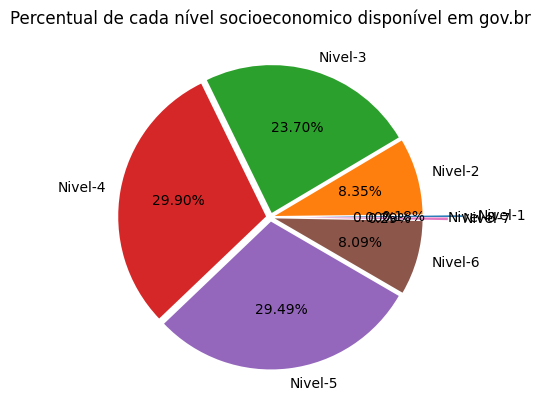

In [21]:

# Seu código para criar o gráfico de pizza
gasto = tabela_2["Quantidade_de_alunos"]
setor = tabela_2["Nível_Socioeconomico"]
explode = (0.3, 0.03, 0.03, 0.03, 0.03, 0.03, 0.2, 0.1)

plt.title("Percentual de cada nível socioeconomico disponível em gov.br")
plt.pie(gasto, labels=setor, autopct="%1.2f%%", explode=explode)
plt.savefig("img/1_pie.png")

class PDF(FPDF):

    def doc_title(self, label):
        self.set_font("helvetica", "B",16)
        self.cell(0, 10, label, 0, 1, "L")
        self.ln()

    def doc_text(self, text):
        self.set_font("helvetica", "",12)
        self.multi_cell(0, 7, text)
        self.ln()

    def doc_image(self, img, x, y, w, h):
        self.image(img, x, y, w, h)

pdf = PDF()
pdf.add_page()

pdf.set_font('helvetica', size=16)
pdf.cell(0, 0, "INSE - Indíce de nível socioeconomico", ln=True, align='L')

text = "\n\nO INSE é uma média do nível socioeconomico dos estudantes, faz parte de uma séries de indicadores educacionais que engloba tanto o ensino fundamental como o ensino médio das escolas públicas do Brasil.\nOs dados foram levantados com base no questionário do ano de 2021, último disponível no (gov.br), nele é possível observar o contexto social dos estudantes e a distrubuição dos níveis no país"
pdf.set_font('helvetica', size=12)
pdf.multi_cell(0, 7, text, align='J')

pdf.image(name="img/1_pie.png", x=20, y=65, w=160, h=110)


texto = "\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPara levantar os níveis uma série de critérios é respeitada como quantidade de comodos, itens na casa, salário e até educação escolar dos responsáveis, de acordo com a (Nota técnica SAEB 2021).\n\nNível - 1: A maioria dos estudantes possui geladeira, televisão, banheiro e celular com internet, mas não possui muitos outros bens e serviços, como computador, TV por internet, carro, entre outros, alguns estudantes têm um ou dois quartos para dormir e a escolaridade dos pais varia de até o 5º ano do ensino fundamental incompleto ou completo.\n\nNível - 2: A maioria dos estudantes está abaixo da média nacional, possuindo geladeira, televisão e banheiro, mas faltam muitos outros bens e serviços. Alguns têm máquina de lavar roupa, até dois celulares com internet, wi-fi, mesa de estudo e escolaridade dos pais entre até o 5º ano do ensino fundamental incompleto e o ensino médio completo.\n\nNível - 3: Os estudantes estão cerca de meio a um desvio-padrão abaixo da média nacional do Inse, possuindo geladeira, televisão, banheiro, wi-fi e máquina de lavar roupa, mas carecem de outros bens e serviços. Alguns têm freezer, TV por internet, dois ou mais quartos para dormir, dois ou mais celulares com internet, e a escolaridade dos pais varia de 5º ano do ensino fundamental completo a ensino médio completo.\n\nNível - 4: Os estudantes estão até meio desvio-padrão abaixo da média nacional do Inse, possuindo geladeira, banheiro, wi-fi, máquina de lavar roupa, TV por internet, freezer e dois ou mais celulares com internet, mas faltam alguns outros bens e serviços. Alguns têm uma ou duas televisões, forno de micro-ondas, garagem, carro, mesa para estudar, um computador, dois ou mais quartos para dormir, e a escolaridade dos pais varia de 5º ano do ensino fundamental completo a ensino médio completo.\n\nNível - 5: Os estudantes estão até meio desvio-padrão acima da média nacional do Inse, possuindo diversos bens e serviços, incluindo geladeira, carros, dispositivos eletrônicos, eletrodomésticos e móveis. Alguns têm múltiplos quartos, e a escolaridade dos pais varia de ensino fundamental completo a ensino superior completo.\n\nNível - 6: Os estudantes estão de meio a um desvio-padrão acima da média nacional do Inse, possuindo amplamente geladeira, carros, eletrônicos, eletrodomésticos e móveis. Alguns têm múltiplos quartos, computadores, e a escolaridade dos pais varia de ensino médio a ensino superior completo.\n\nNível 7: Os estudantes estão de um a dois desvios-padrão acima da média nacional do Inse, possuindo amplamente três ou mais quartos, múltiplos dispositivos eletrônicos, garagem e eletrodomésticos. Alguns têm vários banheiros, carros e geladeiras, e a escolaridade dos pais varia de ensino médio a ensino superior completo.\n\nNível - 8: Os estudantes estão dois desvios-padrão ou mais acima da média nacional do Inse, possuindo uma ampla gama de bens, incluindo múltiplas geladeiras, quartos, televisões, banheiros, dispositivos eletrônicos e eletrodomésticos. A escolaridade dos pais é caracterizada por ensino superior completo."
pdf.set_font('helvetica', size=12)
pdf.multi_cell(0, 7, texto, align='J')


pdf.output("pdf/2_INSE_Brasil.pdf")


3 - Gerei um gráfico de barras com as médias do INSE por estado

''

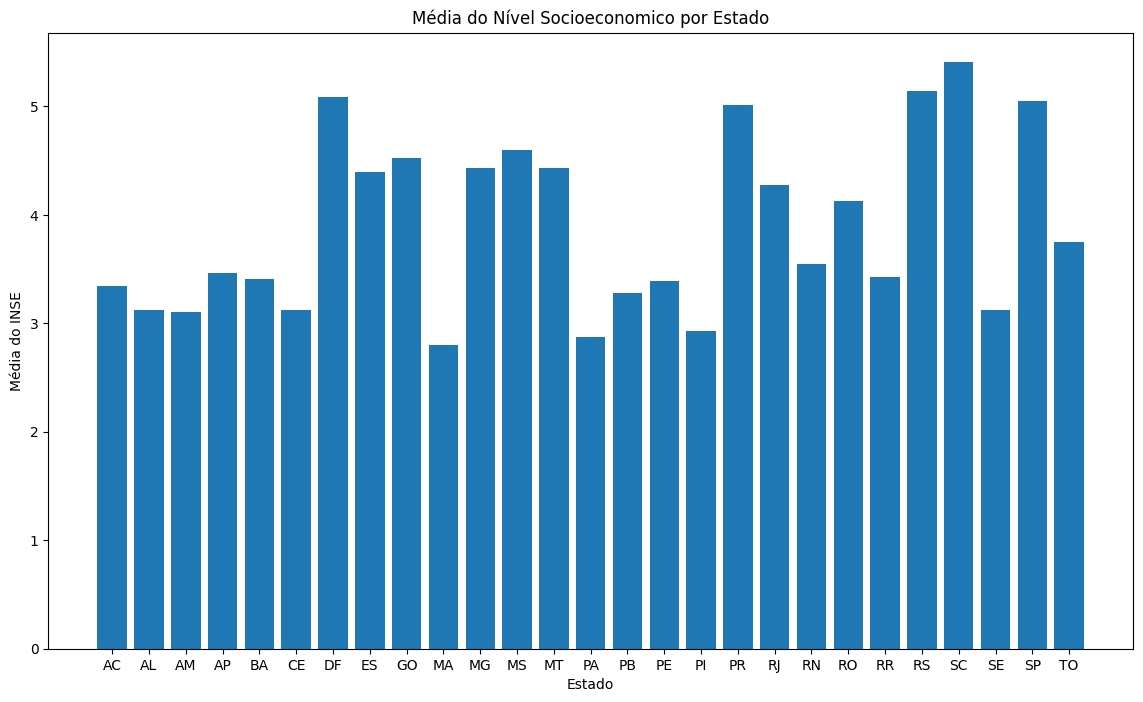

In [19]:
df = pd.read_excel("dados/INSE_2021_escolas.xlsx")

# Agrupe os dados por estado e calcule a média do nível educacional
media_por_estado = df.groupby('SG_UF')['INSE_CLASSIFICACAO'].mean().reset_index()

# Aumente o tamanho da figura
plt.figure(figsize=(14, 8))

# Crie o gráfico de barras verticais
plt.bar(media_por_estado['SG_UF'], media_por_estado['INSE_CLASSIFICACAO'])
plt.xlabel('Estado')
plt.ylabel('Média do INSE')
plt.title('Média do Nível Socioeconomico por Estado')
plt.savefig("img/2_bar_inse.png")

pdf = FPDF('P', 'mm', 'A4')
pdf.add_page()

pdf.set_font('helvetica', size=16)
pdf.cell(0, 0, "INSE por estado", ln=True, align='L')

text = "\n\nComo se é de esperar, os estados com mais renda no Brasil apresentam, em média, níveis socioeconomicos maiores em relação aos estados mais pobres. \n\nSanta Catarina liderou o índice em 2021, em contra partida o Maranhão obteve o índice mais baixo, entre os estados mais ao norte, o estado com melhor índice é Tocantins, porem muito abaixo dos outros estados do centro e do sul do Brasil."

pdf.set_font('helvetica', size=12)
pdf.multi_cell(0, 7, text, align='J')

pdf.image(name="img/2_bar_inse.png", x=10, y=75, w=200, h=110)

pdf.output("pdf/3_INSE_Estados.pdf")


4 - Calculei a média do IDEB por estado, para saber se o comportamento do desenvolvimento socioeconomico por estado é similar ao comportamento do desenvolvimento de educação básica

''

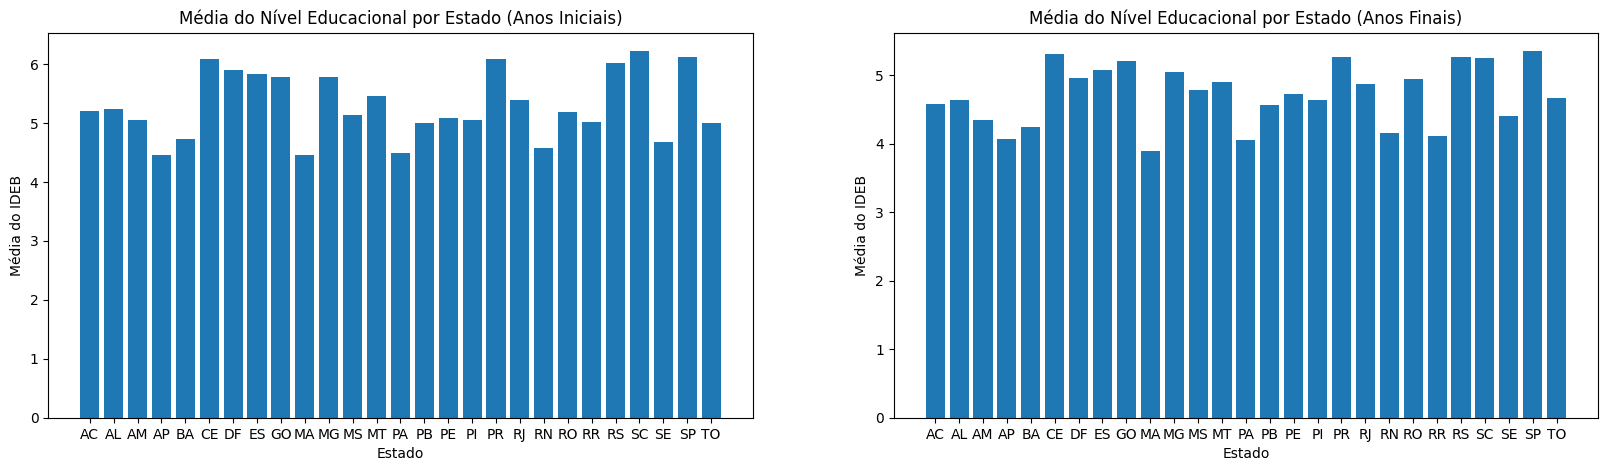

In [24]:
df1 = pd.read_excel("dados/1-Anos_iniciais.xlsx")
df2 = pd.read_excel("dados/2-Anos_finais.xlsx")

# Agrupe os dados por estado e calcule a média do nível educacional
media_anos_iniciais = df1.groupby('SG_UF')['IDEB'].mean().reset_index()
media_anos_finais = df2.groupby('SG_UF')['IDEB'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Crie o gráfico de barras para os anos iniciais
axes[0].bar(media_anos_iniciais['SG_UF'], media_anos_iniciais['IDEB'])
axes[0].set_xlabel('Estado')
axes[0].set_ylabel('Média do IDEB')
axes[0].set_title('Média do Nível Educacional por Estado (Anos Iniciais)')

# Crie o gráfico de barras para os anos finais
axes[1].bar(media_anos_finais['SG_UF'], media_anos_finais['IDEB'])
axes[1].set_xlabel('Estado')
axes[1].set_ylabel('Média do IDEB')
axes[1].set_title('Média do Nível Educacional por Estado (Anos Finais)')

plt.savefig("img/3_bar_ideb.png")

pdf = FPDF('P', 'mm', 'A4')
pdf.add_page()

pdf.set_font('helvetica', size=16)
pdf.cell(0, 0, "IDEB - Índice de desenvolvimento da educação básica", ln=True, align='L')

text = "\n\nO IDEB é um indicador, que foi criado em 2007 para acompanhar o nível dos estudantes das escolas públicas do país, como é se de esperar os estados com maior renda apresentam indices educacionais maiores, porém há uma divergencia que é o estado do Ceará, que apesar de ter nível socioeconomico baixo, apresenta um bom índice escolar, tanto nos anos iniciais como nos anos finais do ensino fundamental.\n\nOs gráficos apresentam bem o panorama do ensino fundamental do país, uma vez que pesquisas apontam médias variando entre 4 e 6."

pdf.set_font('helvetica', size=12)
pdf.multi_cell(0, 7, text, align='J')

pdf.image(name="img/3_bar_ideb.png", x=0, y=80, w=210, h=60)

pdf.output("pdf/4_IDEB.pdf")

